In [51]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from leakageFuncs import normalizeImage,displayImage

In [14]:
with open('data/CentralResults.pkl','rb') as fi:
    centralData = pickle.load(fi)
#centralData[0].keys()

dict_keys(['training', 'testError', 'numWorkers'])

In [59]:
with open('data/FederatedResults.pkl','rb') as fi:
    fedData = pickle.load(fi)

In [128]:
with open('data/ByzantineResults_withDifferentCrit.pkl','rb') as fi:
    byz = pickle.load(fi)

In [137]:
with open('data/ByzantineResults_ALL_BETA=0.pkl','rb') as fi:
    byzEr = pickle.load(fi)

In [52]:
import matplotlib.pyplot as plt
# line 1 points
def plotFigs(centralData,j,k,idx):
    y1 = centralData[idx]['training']['perBatch']
    x1 = [i for i in range(len(centralData[idx]['training']['perBatch']))]
    axs[j,k].plot(x1, y1, label = "Training Error")
    x2 = [i[0] for i in centralData[idx]['training']['test']]
    y2 = [i[1] for i in centralData[idx]['training']['test']]
    axs[j,k].plot(x2, y2, label = "Test Error")

    #axs[j,k].title('Final Test Error: {}'.format(centralData[idx]['testError']))
    axs[j,k].set_title('Final Test Error: {}'.format(centralData[idx]['testError']))
    #axs[j,k].suptitle('Centralized SGD')
    axs[j,k].legend()


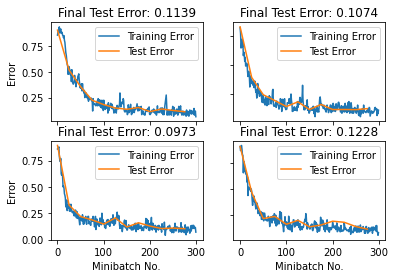

In [122]:
fig, axs = plt.subplots(2, 2)
gs = gridspec.GridSpec(2, 2, width_ratios=[24, 24]) 
idx=0
for i in range(2):
    for j in range(2):
        plotFigs(centralData,i,j,idx)
        idx+=1

idx=0
for ax in axs.flat:
    #axs[j,k].xlabel('Minibatch No.')
    #axs[j,k].ylabel('Error')
    ax.set(xlabel='Minibatch No.', ylabel='Error')

    idx+=1
            

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig("../overleafFigs/centralized.png",dpi=300)

In [123]:
def plotFigsFed(centralData,j,k,idx):
    y1 = centralData[idx]['training'][0]
    x1 = [i for i in range(len(centralData[idx]['training'][0]))]

    axs[j,k].plot(x1, y1, label = "Training Error")
    x2 = [i[0] for i in centralData[idx]['training'][1]['test']]
    y2 = [i[1] for i in centralData[idx]['training'][1]['test']]
    axs[j,k].plot(x2, y2, label = "Test Error")
    #axs[j,k].title('Final Test Error: {}'.format(centralData[idx]['testError']))
    axs[j,k].set_title('Final Test Error: {},k={}'.format(centralData[idx]['FinaltestError'],centralData[idx]['numWorkers']))
    #axs[j,k].suptitle('Centralized SGD')
    axs[j,k].legend()


0.1528
0.1141
0.0934
0.0979


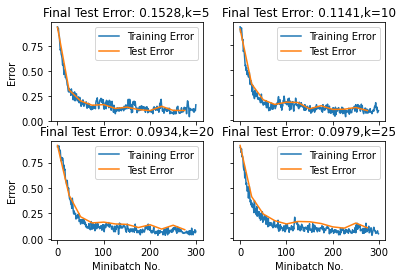

In [124]:
fig, axs = plt.subplots(2, 2)
gs = gridspec.GridSpec(2, 2, width_ratios=[24, 24]) 
idx=0
for i in range(2):
    for j in range(2):
        plotFigsFed(fedData,i,j,idx,)
        idx+=1

idx=0
for ax in axs.flat:
    #axs[j,k].xlabel('Minibatch No.')
    #axs[j,k].ylabel('Error')
    ax.set(xlabel='Minibatch No.', ylabel='Error')

    idx+=1
            

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig("../overleafFigs/federated.png",dpi=300)

In [161]:
byz
workers = [10,20,25]
rates ={10: [.1,.2], 20: [.05,.1,.2], 25:[.05,.1,.2]}
ways =['trimmedMean','median']

In [162]:
byz[10]

{('trimmedMean',
  0): {'training': ([0.9,
    0.875,
    0.885,
    0.89,
    0.895,
    0.85,
    0.8049999999999999,
    0.775,
    0.745,
    0.745,
    0.65,
    0.675,
    0.62,
    0.65,
    0.605,
    0.5700000000000001,
    0.54,
    0.47,
    0.48,
    0.42500000000000004,
    0.54,
    0.41500000000000004,
    0.43500000000000005,
    0.4,
    0.35,
    0.37,
    0.42500000000000004,
    0.4,
    0.32999999999999996,
    0.355,
    0.39,
    0.32499999999999996,
    0.28,
    0.33499999999999996,
    0.32499999999999996,
    0.28,
    0.28500000000000003,
    0.265,
    0.29500000000000004,
    0.22999999999999998,
    0.25,
    0.26,
    0.24,
    0.24,
    0.24,
    0.21999999999999997,
    0.22499999999999998,
    0.18000000000000005,
    0.19999999999999996,
    0.21999999999999997,
    0.21999999999999997,
    0.19999999999999996,
    0.235,
    0.17000000000000004,
    0.16500000000000004,
    0.22499999999999998,
    0.19999999999999996,
    0.17000000000000004,
    0

In [163]:
byzEr[10][('trimmedMean',1)]['FinaltestError']

0.1327

In [173]:
noFix =[]

for way in ways:
    for w in workers:
        for r in rates[w]:
            noFix.append((way,w,r,byzEr[w][(way,int(r*w))]['FinaltestError']))

In [174]:
noFix

[('trimmedMean', 10, 0.1, 0.1327),
 ('trimmedMean', 10, 0.2, 0.1845),
 ('trimmedMean', 20, 0.05, 0.1272),
 ('trimmedMean', 20, 0.1, 0.1467),
 ('trimmedMean', 20, 0.2, 0.1584),
 ('trimmedMean', 25, 0.05, 0.1081),
 ('trimmedMean', 25, 0.1, 0.1212),
 ('trimmedMean', 25, 0.2, 0.1906),
 ('median', 10, 0.1, 0.1233),
 ('median', 10, 0.2, 0.1087),
 ('median', 20, 0.05, 0.1033),
 ('median', 20, 0.1, 0.1079),
 ('median', 20, 0.2, 0.1732),
 ('median', 25, 0.05, 0.0978),
 ('median', 25, 0.1, 0.0955),
 ('median', 25, 0.2, 0.1743)]

In [178]:
        
with open('data/leakageTrials_Cleanset.pkl','rb') as fi:
    res = pickle.load(fi)

idx: 0 , baseModelIT: 5000, minLossBase: 0.01


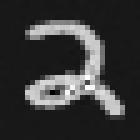

---Next---
idx: 1 , baseModelIT: 5000, minLossBase: 0.01


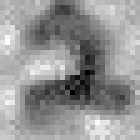

---Next---
idx: 2 , baseModelIT: 5000, minLossBase: 0.01


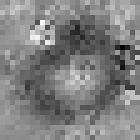

---Next---
idx: 3 , baseModelIT: 5000, minLossBase: 0.01


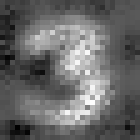

---Next---
idx: 4 , baseModelIT: 5000, minLossBase: 0.01


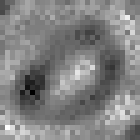

---Next---
idx: 5 , baseModelIT: 5000, minLossBase: 0.01


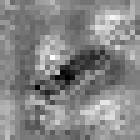

---Next---
idx: 6 , baseModelIT: 5000, minLossBase: 0.01


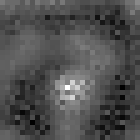

---Next---
idx: 7 , baseModelIT: 5000, minLossBase: 0.01


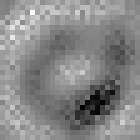

---Next---
idx: 8 , baseModelIT: 5000, minLossBase: 0.01


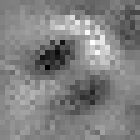

---Next---
idx: 9 , baseModelIT: 5000, minLossBase: 0.01


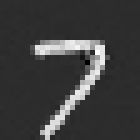

---Next---
idx: 10 , baseModelIT: 5000, minLossBase: 0.01


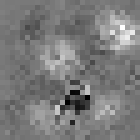

---Next---
idx: 11 , baseModelIT: 5000, minLossBase: 0.01


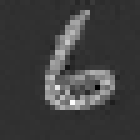

---Next---
idx: 12 , baseModelIT: 5000, minLossBase: 0.01


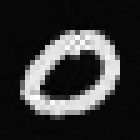

---Next---
idx: 13 , baseModelIT: 5000, minLossBase: 0.01


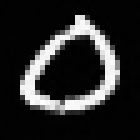

---Next---
idx: 14 , baseModelIT: 5000, minLossBase: 0.01


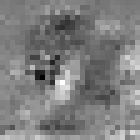

---Next---
idx: 15 , baseModelIT: 5000, minLossBase: 0.01


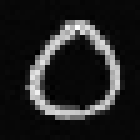

---Next---
idx: 16 , baseModelIT: 5000, minLossBase: 0.01


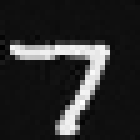

---Next---
idx: 17 , baseModelIT: 5000, minLossBase: 0.01


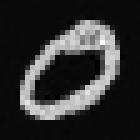

---Next---
idx: 18 , baseModelIT: 5000, minLossBase: 0.01


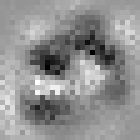

---Next---
idx: 19 , baseModelIT: 5000, minLossBase: 0.01


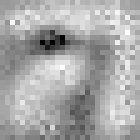

---Next---
idx: 20 , baseModelIT: 5000, minLossBase: 0.01


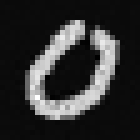

---Next---
idx: 21 , baseModelIT: 5000, minLossBase: 0.01


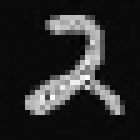

---Next---
idx: 22 , baseModelIT: 5000, minLossBase: 0.01


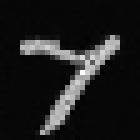

---Next---
idx: 23 , baseModelIT: 5000, minLossBase: 0.01


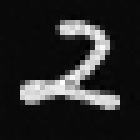

---Next---
idx: 24 , baseModelIT: 5000, minLossBase: 0.01


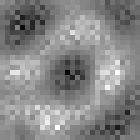

---Next---
idx: 25 , baseModelIT: 5000, minLossBase: 0.01


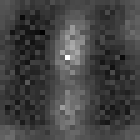

---Next---
idx: 26 , baseModelIT: 5000, minLossBase: 0.01


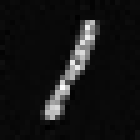

---Next---
idx: 27 , baseModelIT: 5000, minLossBase: 0.01


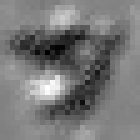

---Next---
idx: 28 , baseModelIT: 5000, minLossBase: 0.01


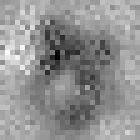

---Next---
idx: 29 , baseModelIT: 5000, minLossBase: 0.01


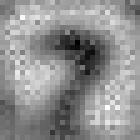

---Next---
idx: 30 , baseModelIT: 10000, minLossBase: 0.01


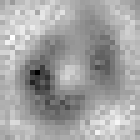

---Next---
idx: 31 , baseModelIT: 10000, minLossBase: 0.01


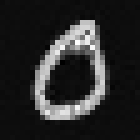

---Next---
idx: 32 , baseModelIT: 10000, minLossBase: 0.01


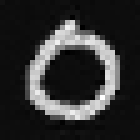

---Next---
idx: 33 , baseModelIT: 10000, minLossBase: 0.01


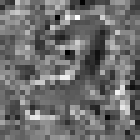

---Next---
idx: 34 , baseModelIT: 10000, minLossBase: 0.01


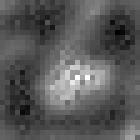

---Next---
idx: 35 , baseModelIT: 10000, minLossBase: 0.01


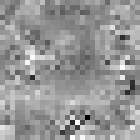

---Next---
idx: 36 , baseModelIT: 10000, minLossBase: 0.01


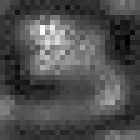

---Next---
idx: 37 , baseModelIT: 10000, minLossBase: 0.01


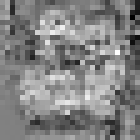

---Next---
idx: 38 , baseModelIT: 10000, minLossBase: 0.01


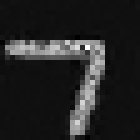

---Next---
idx: 39 , baseModelIT: 10000, minLossBase: 0.01


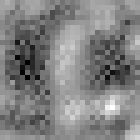

---Next---
idx: 40 , baseModelIT: 10000, minLossBase: 0.01


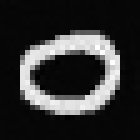

---Next---
idx: 41 , baseModelIT: 10000, minLossBase: 0.01


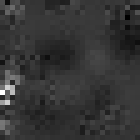

---Next---
idx: 42 , baseModelIT: 10000, minLossBase: 0.01


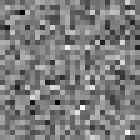

---Next---
idx: 43 , baseModelIT: 10000, minLossBase: 0.01


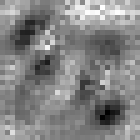

---Next---
idx: 44 , baseModelIT: 10000, minLossBase: 0.01


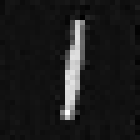

---Next---
idx: 45 , baseModelIT: 10000, minLossBase: 0.01


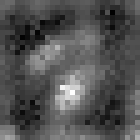

---Next---
idx: 46 , baseModelIT: 10000, minLossBase: 0.01


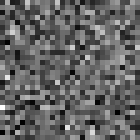

---Next---
idx: 47 , baseModelIT: 10000, minLossBase: 0.01


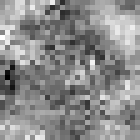

---Next---
idx: 48 , baseModelIT: 10000, minLossBase: 0.01


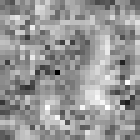

---Next---
idx: 49 , baseModelIT: 10000, minLossBase: 0.01


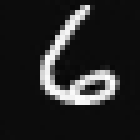

---Next---
idx: 50 , baseModelIT: 10000, minLossBase: 0.01


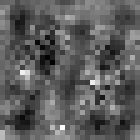

---Next---
idx: 51 , baseModelIT: 10000, minLossBase: 0.01


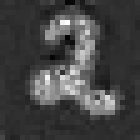

---Next---
idx: 52 , baseModelIT: 10000, minLossBase: 0.01


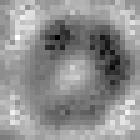

---Next---
idx: 53 , baseModelIT: 10000, minLossBase: 0.01


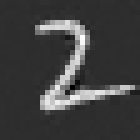

---Next---
idx: 54 , baseModelIT: 10000, minLossBase: 0.01


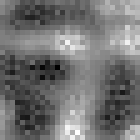

---Next---
idx: 55 , baseModelIT: 10000, minLossBase: 0.01


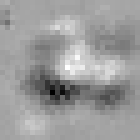

---Next---
idx: 56 , baseModelIT: 10000, minLossBase: 0.01


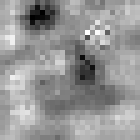

---Next---
idx: 57 , baseModelIT: 10000, minLossBase: 0.01


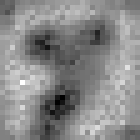

---Next---
idx: 58 , baseModelIT: 10000, minLossBase: 0.01


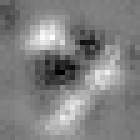

---Next---
idx: 59 , baseModelIT: 10000, minLossBase: 0.01


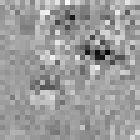

---Next---
idx: 60 , baseModelIT: 5000, minLossBase: 0.1


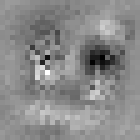

---Next---
idx: 61 , baseModelIT: 5000, minLossBase: 0.1


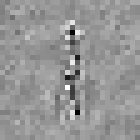

---Next---
idx: 62 , baseModelIT: 5000, minLossBase: 0.1


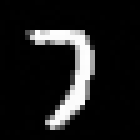

---Next---
idx: 63 , baseModelIT: 5000, minLossBase: 0.1


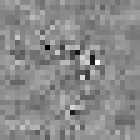

---Next---
idx: 64 , baseModelIT: 5000, minLossBase: 0.1


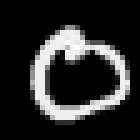

---Next---
idx: 65 , baseModelIT: 5000, minLossBase: 0.1


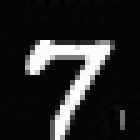

---Next---
idx: 66 , baseModelIT: 5000, minLossBase: 0.1


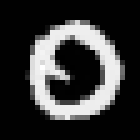

---Next---
idx: 67 , baseModelIT: 5000, minLossBase: 0.1


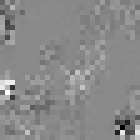

---Next---
idx: 68 , baseModelIT: 5000, minLossBase: 0.1


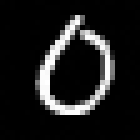

---Next---
idx: 69 , baseModelIT: 5000, minLossBase: 0.1


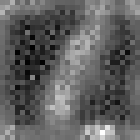

---Next---
idx: 70 , baseModelIT: 5000, minLossBase: 0.1


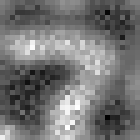

---Next---
idx: 71 , baseModelIT: 5000, minLossBase: 0.1


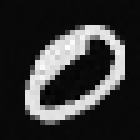

---Next---
idx: 72 , baseModelIT: 5000, minLossBase: 0.1


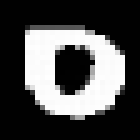

---Next---
idx: 73 , baseModelIT: 5000, minLossBase: 0.1


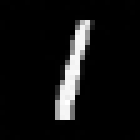

---Next---
idx: 74 , baseModelIT: 5000, minLossBase: 0.1


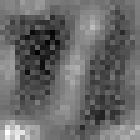

---Next---
idx: 75 , baseModelIT: 5000, minLossBase: 0.1


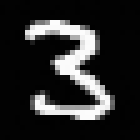

---Next---
idx: 76 , baseModelIT: 5000, minLossBase: 0.1


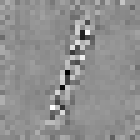

---Next---
idx: 77 , baseModelIT: 5000, minLossBase: 0.1


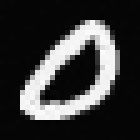

---Next---
idx: 78 , baseModelIT: 5000, minLossBase: 0.1


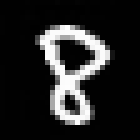

---Next---
idx: 79 , baseModelIT: 5000, minLossBase: 0.1


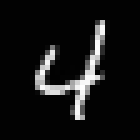

---Next---
idx: 80 , baseModelIT: 5000, minLossBase: 0.1


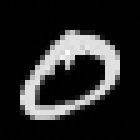

---Next---
idx: 81 , baseModelIT: 5000, minLossBase: 0.1


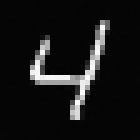

---Next---
idx: 82 , baseModelIT: 5000, minLossBase: 0.1


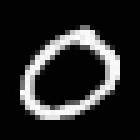

---Next---
idx: 83 , baseModelIT: 5000, minLossBase: 0.1


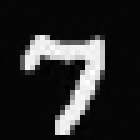

---Next---
idx: 84 , baseModelIT: 5000, minLossBase: 0.1


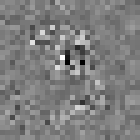

---Next---
idx: 85 , baseModelIT: 5000, minLossBase: 0.1


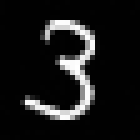

---Next---
idx: 86 , baseModelIT: 5000, minLossBase: 0.1


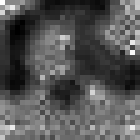

---Next---
idx: 87 , baseModelIT: 5000, minLossBase: 0.1


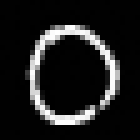

---Next---
idx: 88 , baseModelIT: 5000, minLossBase: 0.1


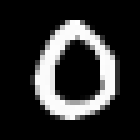

---Next---
idx: 89 , baseModelIT: 5000, minLossBase: 0.1


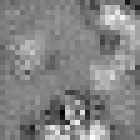

---Next---
idx: 90 , baseModelIT: 10000, minLossBase: 0.1


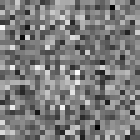

---Next---
idx: 91 , baseModelIT: 10000, minLossBase: 0.1


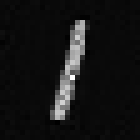

---Next---
idx: 92 , baseModelIT: 10000, minLossBase: 0.1


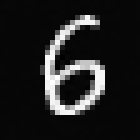

---Next---
idx: 93 , baseModelIT: 10000, minLossBase: 0.1


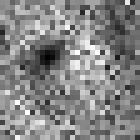

---Next---
idx: 94 , baseModelIT: 10000, minLossBase: 0.1


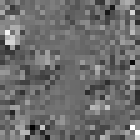

---Next---
idx: 95 , baseModelIT: 10000, minLossBase: 0.1


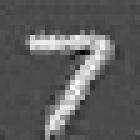

---Next---
idx: 96 , baseModelIT: 10000, minLossBase: 0.1


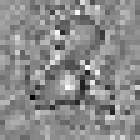

---Next---
idx: 97 , baseModelIT: 10000, minLossBase: 0.1


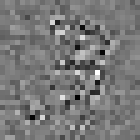

---Next---
idx: 98 , baseModelIT: 10000, minLossBase: 0.1


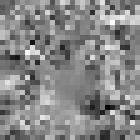

---Next---
idx: 99 , baseModelIT: 10000, minLossBase: 0.1


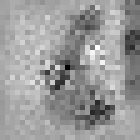

---Next---


In [185]:
for i in range(100):
    print("idx: {} , baseModelIT: {}, minLossBase: {}".format(i,res[i][0],res[i][1],res[i][2]['originalLoss']))
    img = normalizeImage(res[i][2]['leakResults'][-1][1])
    displayImage(img)
    print("---Next---")

In [200]:
goodImages = [normalizeImage(res[i][2]['leakResults'][-1][1]) for i in [0,16,32,40]]
badImages = [normalizeImage(res[i][2]['leakResults'][-1][1]) for i in [4,18,42,43]]
img = np.append(goodImages,badImages)

In [201]:
img.shape

(8,)

In [197]:
from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w,h = (28*5),(28*5)
    grid = Image.new(mode='I',size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

grid = image_grid(img,3,3)

ValueError: cannot determine region size; use 4-item box

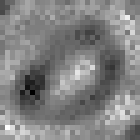

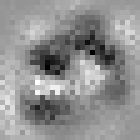

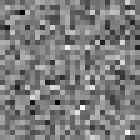

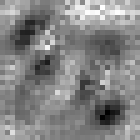

In [203]:
for img in badImages:
    displayImage(img)
    